---
**Autores**: Prof. Dino Magri, Prof. João Nogueira e Prof. Helio

**Contatos**: `professor.dinomagri@gmail.com`, `joaonogueira@fisica.ufc.br`, `helio.hx@gmail.com`

**Licença deste notebook**: 
<br>
<img align="left" width="80" src="https://licensebuttons.net/l/by/3.0/88x31.png" />

<br>
<br>

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)


---

# Series

In [4]:
import pandas as pd

Series é na verdade um array NumPy de 1 dimensão. Ele consiste de um array NumPy com um array de rótulos.

## Criando Series

O construtor geral para criar uma Series é da seguinte maneira:

```python
s = pd.Series(dados)
```

onde ```dados``` pode ser um dos itens abaixo:

    * um numpy.ndarray
    * um dicionário
    * um valor escalar
    
Para testar a criação das Series iremos utilizar os três itens citados acima.

### Utilizando ```numpy.ndarray```

Nesse caso, o índice deve ser do mesmo tamanho do dado. Se um índice não for específicado, o índice padrão ```[0, ... n-1]``` será criado, onde ```n``` é o tamanho do dado.

**```Exemplo 1: Para criar uma Series com 7 números randomicos entre 0 e 1, podemos utilizar o método rand do numpy. Note que não especificamos o índice.```**

In [1]:
import numpy as np

In [2]:
np.random.rand(7)

array([0.25253447, 0.78053507, 0.42168569, 0.45851714, 0.37977477,
       0.45288587, 0.92019035])

In [5]:
ser1 = pd.Series(np.random.rand(7))
ser1

0    0.529811
1    0.058010
2    0.539921
3    0.907516
4    0.440483
5    0.347225
6    0.905611
dtype: float64

**```Exemplo 2: Vamos criar uma Series com os 5 primeiros meses de um ano, sendo que os indices devem ser os nomes.```**

In [ ]:
nome_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai']
print(nome_meses)

['Jan', 'Fev', 'Mar', 'Abr', 'Mai']


In [ ]:
meses = pd.Series(np.arange(1, 6), index=nome_meses)
meses

Jan    1
Fev    2
Mar    3
Abr    4
Mai    5
dtype: int64

In [ ]:
meses.index

Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai'], dtype='object')

### Utilizando dicionário Python

Podemos utilizar um dicionário para criar uma Series. Nesse caso, se um índice for fornecido, os rótulos serão construídos a partir deles. Caso não seja fornecido, as chaves do dicionário serão utilizadas como rótulos.

Os valores dos dicionários são utilizados para popular a Series.

In [6]:
dicionario = {'US' : 'dolar',
              'BR' : 'real',
              'UK' : 'libra',
              'JP' : 'iene'}

In [7]:
moedas = pd.Series(dicionario)
moedas

US    dolar
BR     real
UK    libra
JP     iene
dtype: object

Outra opção seria passar o rótulos que queremos definir via parâmetro ```index```. 

Considere o dicionário abaixo com preços de ações de algumas empresas.

In [8]:
preco_acoes = {'GOOG' : 737.44,
               'FB' : 120.38,
               'TWTR' : 18.44,
               'AMZN' : 744.58,
               'AAPL' : 99.40,
               'NFLX' : 85.55}

Para criar o nosso próprio índice, iremos utilizar as chaves do dicionário que acabamos de criar.

In [9]:
rotulos = list(preco_acoes.keys())
print(rotulos)

['GOOG', 'FB', 'TWTR', 'AMZN', 'AAPL', 'NFLX']


Vamos adicionar um elemento (chave) que não existe no dicionário ```preco_acoes```.

In [10]:
rotulos.append('YHOO')

In [11]:
acoes = pd.Series(preco_acoes, index=rotulos)

In [ ]:
acoes

GOOG    737.44
FB      120.38
TWTR     18.44
AMZN    744.58
AAPL     99.40
NFLX     85.55
YHOO       NaN
dtype: float64

O resultado é que o valor para essa chave será definido como ```NaN``` (Not A Number), indicando que está faltando.

Também podemos utilizar o parâmetro ```name``` que permite nomear a Series e que pode ser útil para combinar objetos de Series em uma estrutura DataFrame.

### Utilizando valores  escalares

Para dados escalares, um índice deve ser fornecido. O valor será repetido pela quantidade de valores que estão no índice.

Podemos utilizar esse método para fornecer uma rápida forma de inicialização.

In [ ]:
ser2 = pd.Series(10, index=['col1', 'col2', 'col3'])
ser2

col1    10
col2    10
col3    10
dtype: int64

## Operações em Series

O comportamento de Series é muito similar ao que fizemos em arrays NumPy, com uma diferença: quando realizamos a operação de fatiamento (slicing), ele também fatia o índice.

### Fatiamento (Slicing)

In [12]:
acoes[:4]

GOOG    737.44
FB      120.38
TWTR     18.44
AMZN    744.58
dtype: float64

In [13]:
acoes[acoes > 100]

GOOG    737.44
FB      120.38
AMZN    744.58
dtype: float64

### Atribuições

Valores podem ser definidos e acessados utilizando o ínidice do rótulo da mesma forma que um dicionário. 

In [14]:
dicionario['BR']

'real'

In [15]:
acoes['GOOG']

737.44

In [17]:
acoes['GOOG'] = 1200

In [18]:
acoes

GOOG    1200.00
FB       120.38
TWTR      18.44
AMZN     744.58
AAPL      99.40
NFLX      85.55
YHOO        NaN
dtype: float64

In [19]:
print(acoes['AOL'])

KeyError: ignored

Podemos evitar esse erro, utilizando o método ```get``` disponível. Nesse caso, o valor ```nan``` é devolvido caso não existe na Series.

In [20]:
acoes.get('AOL', np.NaN)

nan

### Outras operações

Podemos utilizar operações aritméticas e estatísticas, da mesma forma que nos arrays NumPy.

In [ ]:
acoes

GOOG    1200.00
FB       120.38
TWTR      18.44
AMZN     744.58
AAPL      99.40
NFLX      85.55
YHOO        NaN
dtype: float64

In [ ]:
# Média
acoes.mean()

378.0583333333334

In [ ]:
# Desvio Padrão
acoes.std()

483.5000096139262

In [ ]:
ser1

0    0.144722
1    0.585557
2    0.181535
3    0.643577
4    0.237544
5    0.136102
6    0.175668
dtype: float64

In [ ]:
ser1 * 2

0    0.289444
1    1.171114
2    0.363071
3    1.287154
4    0.475087
5    0.272204
6    0.351335
dtype: float64

In [ ]:
np.sqrt(ser1)

0    0.380423
1    0.765217
2    0.426070
3    0.802233
4    0.487384
5    0.368920
6    0.419127
dtype: float64

Uma característica importante da Series é que os dados são automaticamente alinhados com base nos rótulos.

Uma vez que temos uma series construída, podemos plotar os valores dela de forma fácil com o método `plot()`.

# Plotando uma série

In [21]:
acoes

GOOG    1200.00
FB       120.38
TWTR      18.44
AMZN     744.58
AAPL      99.40
NFLX      85.55
YHOO        NaN
dtype: float64

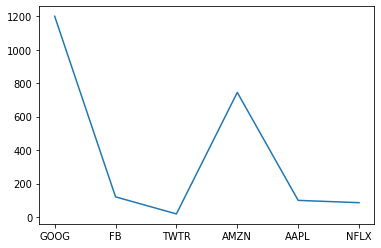

In [22]:
acoes.plot();

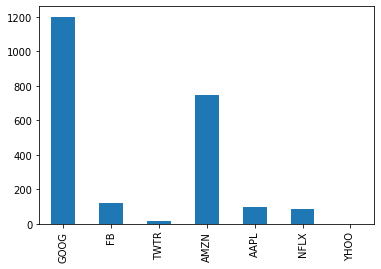

In [23]:
acoes.plot(kind='bar');

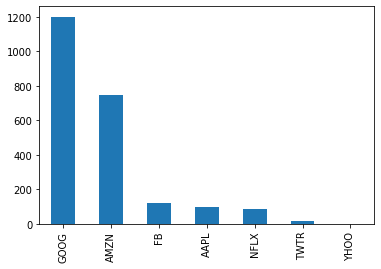

In [24]:
acoes.sort_values(ascending=False).plot(kind='bar')

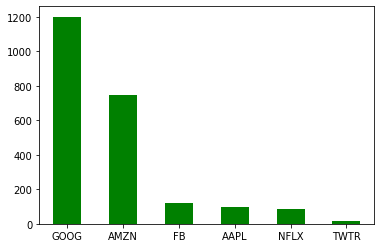

In [25]:
acoes.dropna().sort_values(ascending=False).plot(kind='bar', color='green', rot=0)

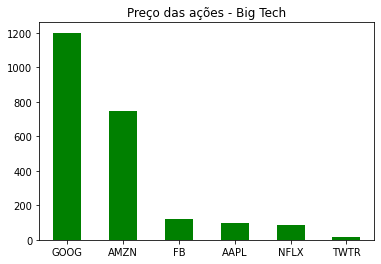

In [26]:
acoes.dropna().sort_values(ascending=False).plot(kind='bar', color='green', rot=0, title='Preço das ações - Big Tech')